In [1]:
import pandas as pd
import numpy as np
a = pd.read_csv("C:\\Users\\HP\\Desktop\\Summer19\\CSS\\GenderGap-master\\data\\ddf.csv", sep=',')
b = pd.read_csv("C:\\Users\\HP\\Desktop\\Summer19\\CSS\\GenderGap-master\\data\\Crawl_data.csv", sep=',')
n = np.array(a)
year, gender, releases, income = n[:,2], n[:,3], n[:,4], n[:,6]

In [2]:
######################################################################
## Representation Gap

In [3]:
a['gender'].value_counts()

Male      15100
Female     1815
Name: gender, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
a['g_label'] = LE.fit_transform(a['gender'])

In [5]:
males = a[a['g_label'] == 1]
females = a[a['g_label'] == 0]

In [6]:
M = males['gender'].count()
F = females['gender'].count()
N = M + F
N

16915

In [7]:
M_percent = (M/N)*100
M_percent

89.26987880579368

In [8]:
F_percent = (F/N)*100
F_percent

10.730121194206326

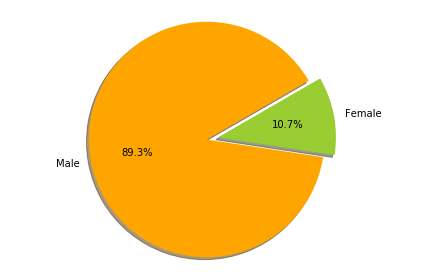

In [10]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Male', 'Female'
sizes = [15100, 1815]
colors = ['orange', 'yellowgreen']
explode = (0, 0.1)  # explode 2nd slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=30)
plt.tight_layout()
plt.axis('equal')
plt.show()


In [11]:
######################################################################
## Productivity Gap

In [12]:
M_PG = float(males['num_of_releases'].sum())/float(males['gender'].count())
F_PG = float(females['num_of_releases'].sum())/float(females['gender'].count())

In [21]:
label = 'Male Releases', 'Female Releases'
size=[M_PG/m_LS, F_PG/f_LS]

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.barh(index, size)
    plt.xlabel('Gender', fontsize=10)
    plt.xlabel('Average Number of Release', fontsize=10)
    plt.yticks(index, label, fontsize=10, rotation=30)
    plt.title('Productivity Gap', fontsize=15)
    plt.show()

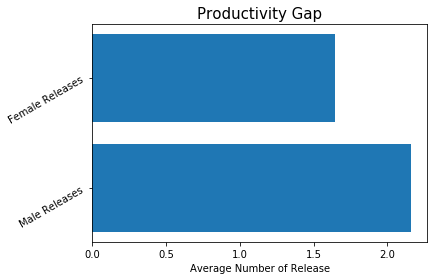

In [22]:
plot_bar_x()

In [12]:
######################################################################
## Payment Gap

In [13]:
float(males['Income'].sum())/float(males['gender'].count())

4.2715283001322515

In [14]:
float(females['Income'].sum())/float(females['gender'].count())

4.072567513346006

In [15]:
import scipy.stats as st
st.ttest_ind(males['Income'], females['Income'], axis=0, equal_var=False)

Ttest_indResult(statistic=2.033269257466244, pvalue=0.04213963776568456)

In [ ]:
######################################################################
## Trend over Year

In [14]:
file_name_source = "crawl_data_lifspan.csv"
file_address = 'C://Users//HP//'

df = pd.read_csv(file_address + file_name_source,sep='\t' ,error_bad_lines=False, lineterminator='\n',encoding='ISO-8859-1')

In [15]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['g1_label'] = LE.fit_transform(df['gender'])

In [16]:
males1 = df[df['g1_label'] == 1]
females1 = df[df['g1_label'] == 0]

In [17]:
m_LS = np.mean(males1['life_span'])
f_LS = np.mean(females1['life_span'])

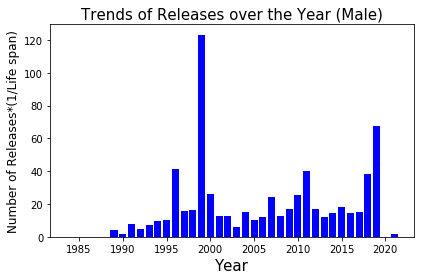

In [18]:
plt.bar(males['year'], males['num_of_releases']/m_LS, color='b')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Releases*(1/Life span)', fontsize = 12)
plt.title('Trends of Releases over the Year (Male)', fontsize = 15)
plt.tight_layout()
plt.show()

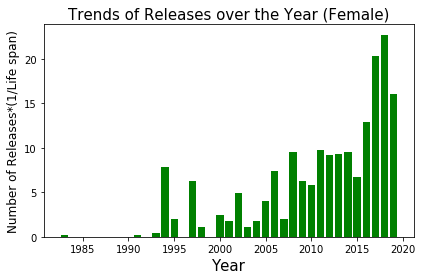

In [20]:
plt.bar(females['year'], females['num_of_releases']/f_LS, color='g')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Releases*(1/Life span)', fontsize = 12)
plt.title('Trends of Releases over the Year (Female)', fontsize = 15)
plt.tight_layout()
plt.show()

In [23]:
size

[2.1611734663578597, 1.6413470993117012]